<a id='sommaire'></a>
<h1 style='text-align:center;border:5px double;border-color:gray;'>
    <br/>
    PROJET 6<br/>
</h1>



## [Misson 0](#m0)
* [Description des données](#description)  
* [Analyses univariées](#uni)  
* [Analyses bivariées](#bi)  

## [Mission 1](#m1)
* [Eboulis des valeurs propres](#ebouli)  
* [Cercle des corrélations](#correlation)  
* [Representation des individus dans le premier plan factoriel](#individus)  
* [Analyse de la qualité de la représentation](#analyse)  
* [Analyse de la qualité de la contribution aux axes](#analyse2)  

## [Mission 2](#m2)
* [Classification](#classification)  
* [Visualisation de la partition](#visualisation)  

## [Mission 3](#m3)
* [Regression logistique](#regression)  
* [Test sur un nouvel échatillon](#test)

In [1]:
#! coding:utf-8
import pandas as pd
print(pd.__version__)

0.24.2


In [2]:
import numpy as np
print(np.__version__)

1.15.4


In [3]:
import seaborn as sns
print(sns.__version__)

sns.set(rc={'figure.figsize':(9,9)})

0.9.0


In [4]:
import matplotlib
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(8,8)})

print(matplotlib.__version__)

2.2.2


In [5]:
import scipy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, fcluster, centroid
print(scipy.__version__)

1.1.0


In [6]:
import sklearn
from sklearn import preprocessing, decomposition, metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
print(sklearn.__version__)

0.20.1


In [7]:
from functions import *

In [8]:
import os
os.makedirs('graph', exist_ok=True)

<a id='m0'></a>
## Misson 0

<a id='description'></a>
<h3 style='color:#8677b2'>Description des données</h3>

[Haut de page](#sommaire)

In [9]:
#Chargement du fichier
billets = pd.read_csv('billets.csv')

billets.head()

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [10]:
#Recherche de valeurs nulles ou manquantes
billets.isnull().sum()

is_genuine      0
length          0
height_left     0
height_right    0
margin_low      0
margin_up       0
diagonal        0
dtype: int64

In [11]:
#Taille  des données
billets.shape

(170, 7)

Nous avons une table contenant 170 billets composés par 7 variables:  
- is_genuine:  
True (1) -> 100 vrai billet  
False (0) -> 70 faux billet  
- length: longueur du billet (mm)  
- height_left: hauteur du billet à gauche (mm)  
- height_right: hauteur du billet à droite (mm)  
- margin_low: marge inférieure du billet (mm)  
- margin_up: marge supérieure du billet (mm)  
- diagonal: diagonale du billet (mm)  
  
Il n'y a pas de valeurs manquantes ou nulles dans le jeu de données.

In [12]:
#Description de la table
billets.describe(include='all')

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


In [13]:
#Description des vrais billets
vrais_billets = billets[billets['is_genuine'] == True]
vrais_billets.describe(include='all')

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200
std,NaN,0.307981,0.296251,0.292406,0.314509,0.197726,0.380476
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,111.760000
25%,NaN,171.790000,103.740000,103.557500,3.900000,2.937500,112.995000
50%,NaN,172.005000,103.915000,103.760000,4.080000,3.070000,113.210000
75%,NaN,172.162500,104.145000,103.972500,4.382500,3.192500,113.505000


In [14]:
#Description des faux billets
faux_billets = billets[billets['is_genuine'] == False]
faux_billets.describe(include='all')

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
count,70,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,70,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
std,NaN,0.297426,0.213130,0.253152,0.540846,0.185102,0.676931
min,NaN,171.380000,103.780000,103.440000,3.820000,2.980000,109.970000
25%,NaN,171.682500,104.082500,103.982500,4.952500,3.185000,111.270000
50%,NaN,171.875000,104.215000,104.170000,5.265000,3.335000,111.765000
75%,NaN,172.047500,104.377500,104.280000,5.702500,3.450000,111.985000


<a id='uni'></a>
<h3 style='color:#8677b2'>Analyses univariées</h3>

[Haut de page](#sommaire)

In [15]:
#Création de variables
length = billets['length']
height_left = billets['height_left']
height_right = billets['height_right']
margin_low = billets['margin_low']
margin_up = billets['margin_up']
diagonal = billets['diagonal']
billets_idx = billets.columns.drop('is_genuine')

/home/begalain/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


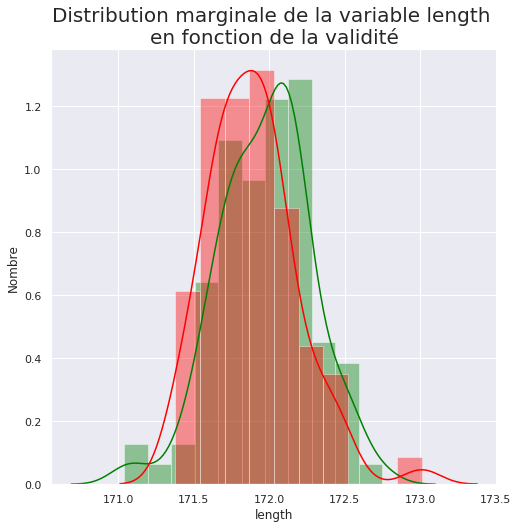

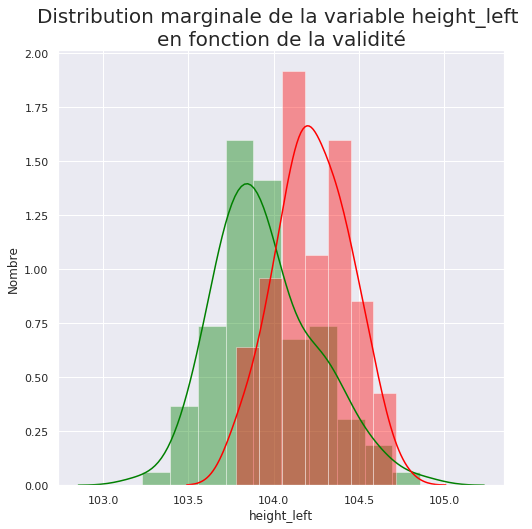

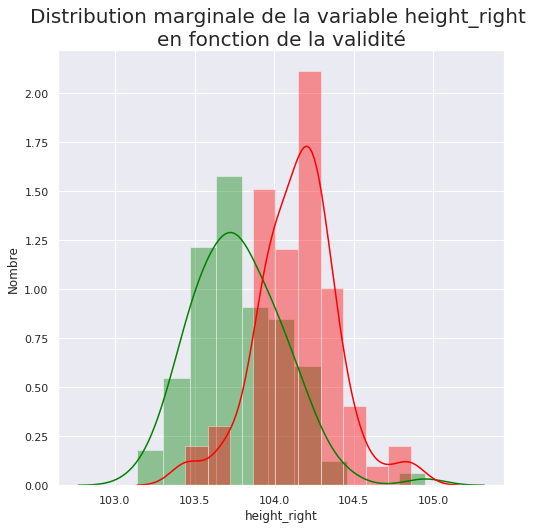

In [16]:
#Distribution marginale de la varialbe length en fonction de la validité
sns.distplot(vrais_billets['length'], color='green', kde=True)
sns.distplot(faux_billets['length'], color='red', kde=True)
plt.ylabel('Nombre')
plt.title(f'Distribution marginale de la variable {billets.columns[1]} \nen fonction de la validité',
          fontsize=20)
plt.savefig(f'graph/Distribution_marginale_variable_{billets.columns[1]}_fonction_validite')
plt.show()

#Distribution marginale de la varialbe height_left en fonction de la validité
sns.distplot(vrais_billets['height_left'], color='green', kde=True)
sns.distplot(faux_billets['height_left'], color='red', kde=True)
plt.ylabel('Nombre')
plt.title(f'Distribution marginale de la variable {billets.columns[2]} \nen fonction de la validité',
          fontsize=20)
plt.savefig(f'graph/Distribution_marginale_variable_{billets.columns[2]}_fonction_validite')
plt.show()

#Distribution marginale de la varialbe height_right en fonction de la validité
sns.distplot(vrais_billets['height_right'], color='green', kde=True)
sns.distplot(faux_billets['height_right'], color='red', kde=True)
plt.ylabel('Nombre')
plt.title(f'Distribution marginale de la variable {billets.columns[3]} \nen fonction de la validité',
          fontsize=20)
plt.savefig(f'graph/Distribution_marginale_variable_{billets.columns[3]}_fonction_validite')
plt.show()

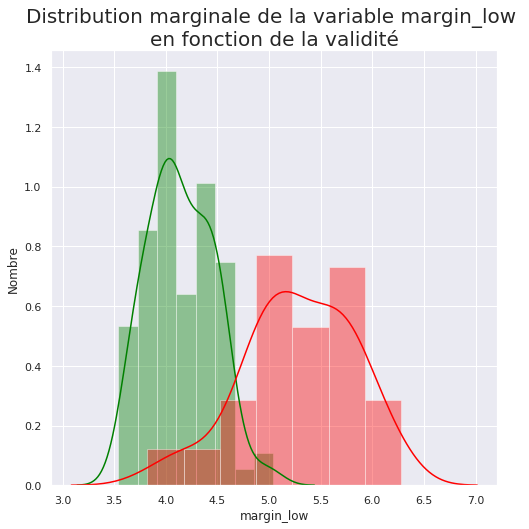

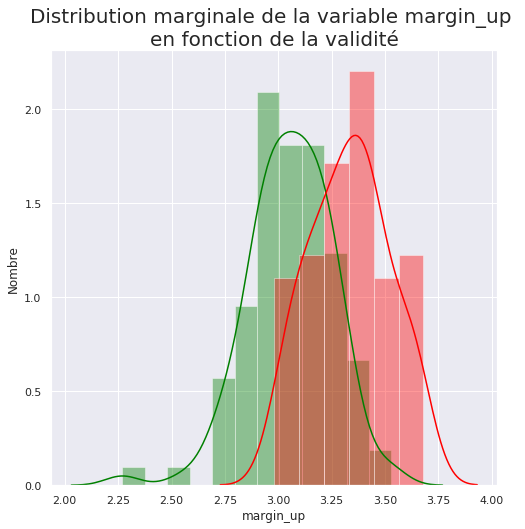

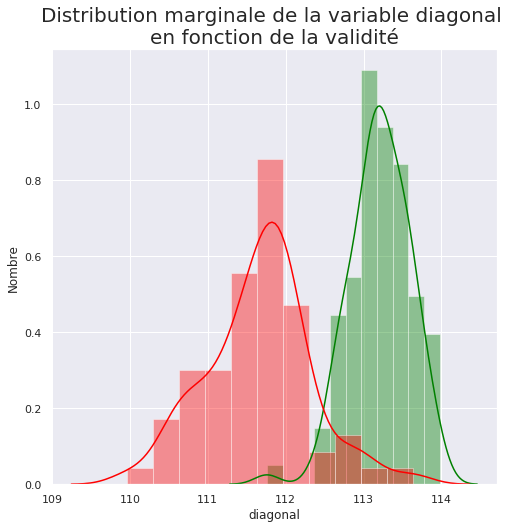

In [17]:
#Distribution marginale de la varialbe margin_low en fonction de la validité
sns.distplot(vrais_billets['margin_low'], color='green', kde=True)
sns.distplot(faux_billets['margin_low'], color='red', kde=True)
plt.ylabel('Nombre')
plt.title(f'Distribution marginale de la variable {billets.columns[4]} \nen fonction de la validité',
          fontsize=20)
plt.savefig(f'graph/Distribution_marginale_variable_{billets.columns[4]}_fonction_validite')
plt.show()

#Distribution marginale de la varialbe margin_up en fonction de la validité
sns.distplot(vrais_billets['margin_up'], color='green', kde=True)
sns.distplot(faux_billets['margin_up'], color='red', kde=True)
plt.ylabel('Nombre')
plt.title(f'Distribution marginale de la variable {billets.columns[5]} \nen fonction de la validité',
          fontsize=20)
plt.savefig(f'graph/Distribution_marginale_variable_{billets.columns[5]}_fonction_validite')
plt.show()

#Distribution marginale de la varialbe diagonal en fonction de la validité
sns.distplot(vrais_billets['diagonal'], color='green', kde=True)
sns.distplot(faux_billets['diagonal'], color='red', kde=True)
plt.ylabel('Nombre')
plt.title(f'Distribution marginale de la variable {billets.columns[6]} \nen fonction de la validité',
          fontsize=20)
plt.savefig(f'graph/Distribution_marginale_variable_{billets.columns[6]}_fonction_validite')
plt.show()

<a id='bi'></a>
<h3 style='color:#8677b2'>Analyses bivariées</h3>

[Haut de page](#sommaire)

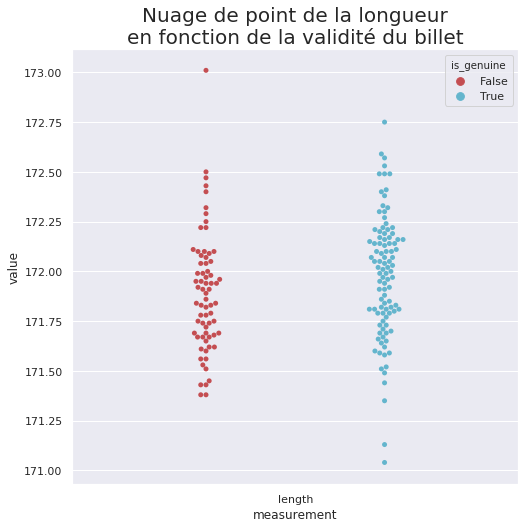

In [18]:
#Nuage de point de la longueur en fonction de la validité du billet 
billets_len = billets[['is_genuine', 'length']]

billetsm = pd.melt(billets_len, 'is_genuine', var_name='measurement')
ax3 = sns.swarmplot(x='measurement', y='value', hue='is_genuine', palette=['r', 'c', 'y'], data=billetsm,
             dodge=True)
ax3.set_title('Nuage de point de la longueur\nen fonction de la validité du billet', fontsize=20)
plt.savefig('graph/Nuage_point_longueur_fonction_validite.png')
plt.show()

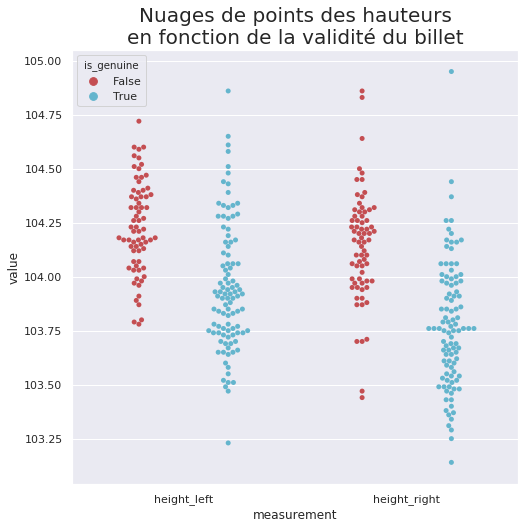

In [19]:
#Nuages de points des hauteurs en fonction de la validité du billet
billets_height = billets[['is_genuine', 'height_left', 'height_right']]

billetsm = pd.melt(billets_height, 'is_genuine', var_name='measurement')
ax1 = sns.swarmplot(x='measurement', y='value', hue='is_genuine', palette=['r', 'c', 'y'], data=billetsm,
             dodge=True)
ax1.set_title('Nuages de points des hauteurs\nen fonction de la validité du billet', fontsize=20)
plt.savefig('graph/Nuages_points_hauteurs_fonction_validite.png')
plt.show()

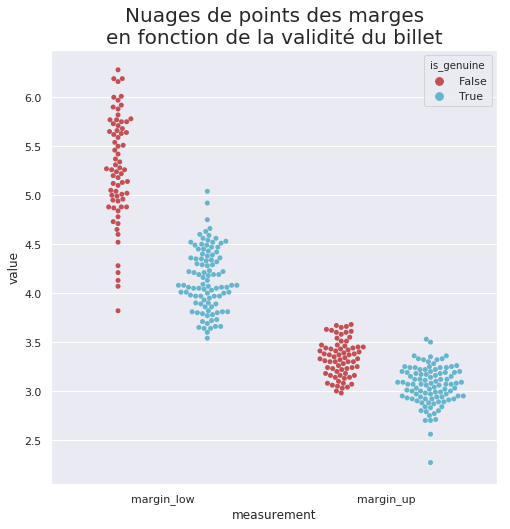

In [20]:
#Nuages de points des marges en fonction de la validité du billet
billets_marg = billets[['is_genuine', 'margin_low', 'margin_up']]

billetsm = pd.melt(billets_marg, 'is_genuine', var_name='measurement')
ax2 = sns.swarmplot(x='measurement', y='value', hue='is_genuine', palette=['r', 'c', 'y'], data=billetsm,
             dodge=True)
ax2.set_title('Nuages de points des marges\nen fonction de la validité du billet', fontsize=20)
plt.savefig('graph/Nuages_points_marges_fonction_validite.png')
plt.show()

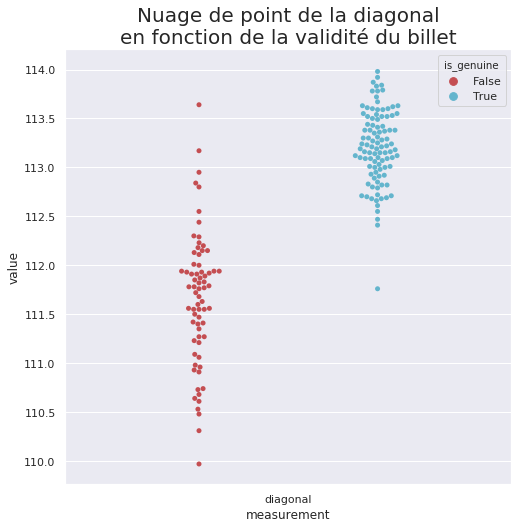

In [21]:
#Nuage de point de la diagonal en fonction de la validité du billet
billets_dia = billets[['is_genuine', 'diagonal']]

billetsm = pd.melt(billets_dia, 'is_genuine', var_name='measurement')
ax4 = sns.swarmplot(x='measurement', y='value', hue='is_genuine', palette=['r', 'c', 'y'], data=billetsm,
             dodge=True)
ax4.set_title('Nuage de point de la diagonal\nen fonction de la validité du billet', fontsize=20)
plt.savefig('graph/Nuage_point_diagonal_fonction_validite.png')
plt.show()

<a id='m1'></a>
## Mission 1

<a id='ebouli'></a>
<h3 style='color:#8677b2'>Eboulis des valeurs propres</h3>

[Haut de page](#sommaire)

In [22]:
#Préparation des données pour le clustering
billets1 = billets.set_index('is_genuine')
X = billets1.values.astype(float)
is_genuine = billets1.index
n_comp = len(billets1.columns)
n = billets1.shape[0]
p = billets1.shape[1]
features =billets1.columns

#Centrage et réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#Instanciation de la reduction de dimension
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

#Vérification des moyennes (aux erreurs de troncature près) et des écarts-type unitaires
print(np.mean(X_scaled, axis=0), np.std(X_scaled, axis=0))

[ 7.69580478e-15  3.14728635e-14  3.61958829e-14  7.52339367e-16
 -1.50467873e-15 -1.37510918e-14] [1. 1. 1. 1. 1. 1.]


In [23]:
#Proportion de variance expliquée
prop_var = pca.explained_variance_ratio_ * 100
np.around(prop_var, 1)

array([47.4, 22. , 14.2,  8.5,  4.6,  3.2])

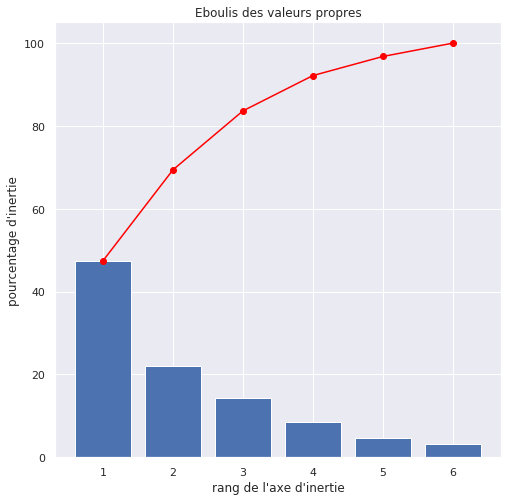

F1=47.0% de variance expliquée.
F2=22.0% de variance expliquée.
F3=14.0% de variance expliquée.
F4=9.0% de variance expliquée.
F5=5.0% de variance expliquée.
F6=3.0% de variance expliquée.


In [24]:
#Affichage des éboulis des valeurs propres
display_scree_plot(pca)
plt.savefig('graph/Eboulis_valeurs_propres_tot.png')
plt.show()

a = ['F'+str(i+1)+'='+str(np.around(prop_var[i],0))+'% de variance expliquée.' for i in range(p)]
for j in range(p):
    print(a[j])

<a id='correlation'></a>
<h3 style='color:#8677b2'>Cercle des corrélations</h3>

[Haut de page](#sommaire)

In [25]:
#Variance expliquée corrigée
eigval= (n-1)/n*pca.explained_variance_
eigval

array([2.84687523, 1.31742636, 0.85407146, 0.51157773, 0.27676935,
       0.19327987])

In [26]:
#Racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#Corrélation des variables avec les axes
covar = np.zeros((p,p))
for k in range(p):
    covar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

mat_cor = pd.DataFrame(np.around(covar, 2),
                       index=features,
                       columns=['COR_'+str(i + 1) for i in range(p)])
mat_cor

,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6
length,0.12,0.89,-0.08,-0.40,-0.12,0.05
height_left,0.80,0.39,0.11,0.20,0.38,0.10
height_right,0.83,0.27,0.14,0.33,-0.26,-0.21
margin_low,0.73,-0.37,0.47,-0.16,-0.16,0.24
margin_up,0.59,-0.16,-0.76,0.10,-0.10,0.16
diagonal,-0.79,0.36,0.12,0.41,-0.13,0.23


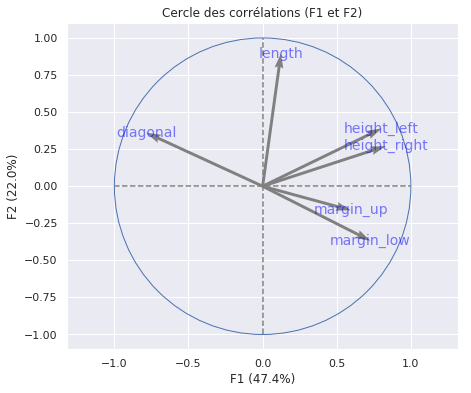

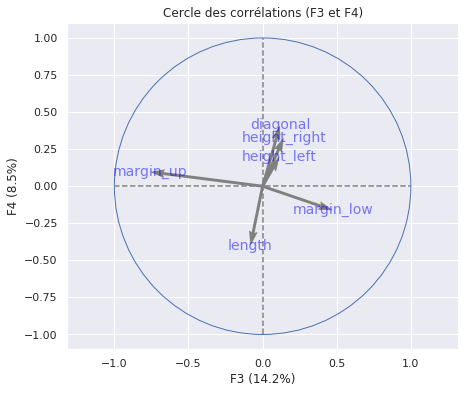

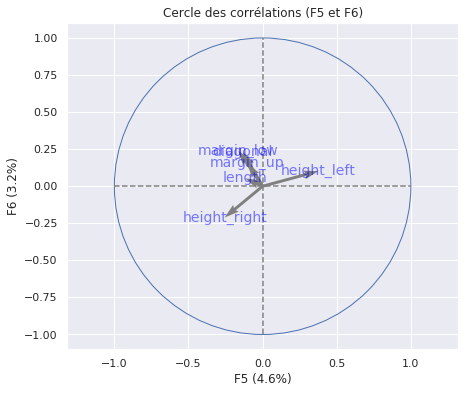

In [27]:
#Cercle des corrélations
display_circles(covar.T, n_comp, pca,
                [(0,1), (2,3), (4,5)],
                labels = features)
plt.show()

<a id='individus'></a>
<h3 style='color:#8677b2'>Representation des individus dans les trois premiers plans factoriels</h3>

[Haut de page](#sommaire)

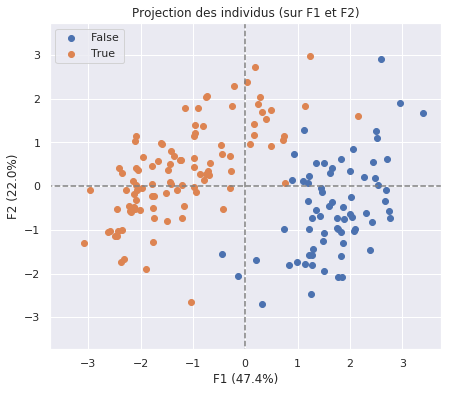

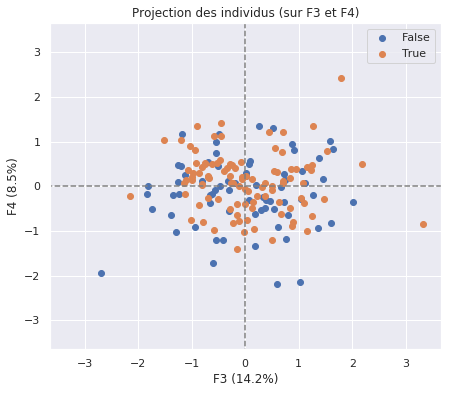

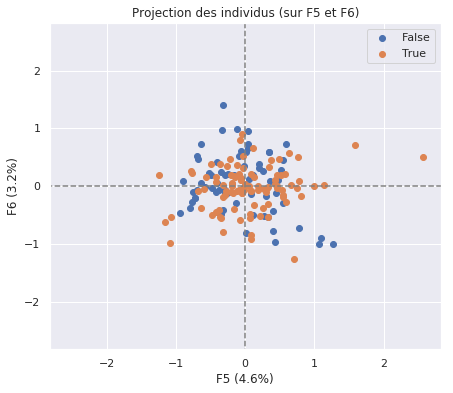

In [28]:
#Calcul des coordonnées des individus sur le premier plan factoriel
X_projected = pca.transform(X_scaled)

#Projection des individus dans le 1er plan factoriel
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1), (2,3), (4,5)],
                         labels=None,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.show()

<a id='analyse'></a>
<h3 style='color:#8677b2'>Analyse de la qualité de représentation</h3>

[Haut de page](#sommaire)

* Contribution à l'inertie totale

In [29]:
#Contribution des individus dans l'inertie total
di = np.sum(X_scaled**2, axis=1)
ctr_tot = pd.DataFrame({'is_genuine':is_genuine, 'd_i': np.around(di, 2)})

#Individus avec le moins de contribution à l'inertie totale
ctr_tot.sort_values(by='d_i').head()


,is_genuine,d_i
64,True,0.81
98,True,0.88
85,True,1.43
76,True,1.44
59,True,1.48


In [30]:
#Individus avec le plus de contribution à l'inertie totale
ctr_tot.sort_values(by='d_i').tail()

,is_genuine,d_i
39,True,15.05
122,False,16.79
4,True,18.04
0,True,18.41
166,False,20.63


In [31]:
ctr_tot[ctr_tot['is_genuine'] == True].describe()

,d_i
count,100.000000
mean,5.375100
std,3.285223
min,0.810000
25%,3.045000
50%,4.965000
75%,6.472500
max,18.410000


In [32]:
ctr_tot[ctr_tot['is_genuine'] == False].describe()

,d_i
count,70.000000
mean,6.893000
std,3.395946
min,1.990000
25%,4.972500
50%,6.130000
75%,8.370000
max,20.630000


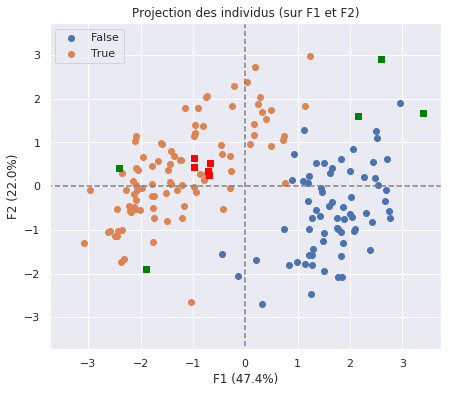

In [33]:
#Projection des individus dans le 1er plan factoriel
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],#, (2,3), (4,5)],
                         labels=None,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.scatter(X_projected[59,0], X_projected[59,1], marker='s', c='red')
plt.scatter(X_projected[64,0], X_projected[64,1], marker='s', c='red')
plt.scatter(X_projected[76,0], X_projected[76,1], marker='s', c='red')
plt.scatter(X_projected[85,0], X_projected[85,1], marker='s', c='red')
plt.scatter(X_projected[98,0], X_projected[98,1], marker='s', c='red')
plt.scatter(X_projected[0,0], X_projected[0,1], marker='s', c='green')
plt.scatter(X_projected[4,0], X_projected[4,1], marker='s', c='green')
plt.scatter(X_projected[39,0], X_projected[39,1], marker='s', c='green')
plt.scatter(X_projected[122,0], X_projected[122,1], marker='s', c='green')
plt.scatter(X_projected[166,0], X_projected[166,1], marker='s', c='green')
plt.savefig('graph/proj_ind_inertie_tot_head_tail.png')
plt.show()

* Qualité de représentation des individus

In [34]:
#Qualité de représentation des individus
cos2 = X_projected**2
for j in range(p):
    cos2[:,j] = 100 * cos2[:,j]/di

qual_repr = pd.DataFrame(np.around(cos2, 1),
                         index=is_genuine,
                         columns=['COS2_' + str(i + 1) for i in range(p)])

qual_repr = qual_repr.reset_index()

qual_repr.head()

,is_genuine,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6
0,True,25.2,13.9,17.4,32.2,2.7,8.7
1,True,81.8,5.1,5.4,2.2,0.1,5.4
2,True,78.5,0.0,14.9,2.8,3.6,0.1
3,True,88.3,0.2,5.9,5.6,0.0,0.0
4,True,32.0,0.9,61.1,3.9,1.0,1.1


In [35]:
#Vérification
np.sum(cos2, axis=1)

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 10

In [36]:
#Les 5 billets avec la moins bonne qualité de représentation dans le 1er plan factoriel
qual_repr1 = qual_repr[['is_genuine', 'COS2_1', 'COS2_2']]
qual_repr2 = qual_repr1.copy()
qual_repr2['premier_plan_fact'] = qual_repr2.sum(axis=1)
qual_repr2.sort_values(by='premier_plan_fact').head(5)

,is_genuine,COS2_1,COS2_2,premier_plan_fact
35,True,2.5,0.0,3.5
160,False,6.9,4.3,11.2
43,True,3.9,6.3,11.2
88,True,2.3,13.6,16.9
52,True,7.7,10.6,19.3


In [37]:
#Les 5 billets avec la meilleure qualité de représentation dans le 1er plan factoriel
qual_repr2.sort_values(by='premier_plan_fact').tail()

,is_genuine,COS2_1,COS2_2,premier_plan_fact
90,True,89.8,6.1,96.9
45,True,63.1,33.1,97.2
46,True,96.2,0.3,97.5
143,False,97.3,0.8,98.1
148,False,57.8,41.1,98.9


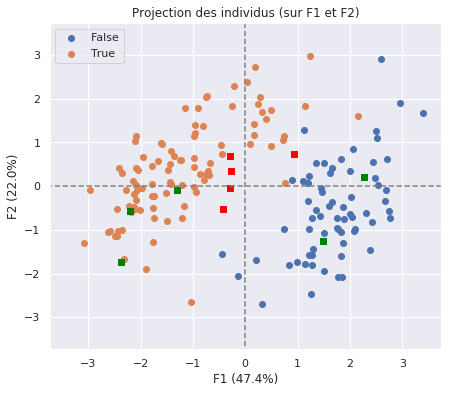

In [38]:
#Projection des individus dans le 1er plan factoriel
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],#, (2,3), (4,5)],
                         labels=None,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.scatter(X_projected[35,0], X_projected[35,1], marker='s', c='red')
plt.scatter(X_projected[43,0], X_projected[43,1], marker='s', c='red')
plt.scatter(X_projected[52,0], X_projected[52,1], marker='s', c='red')
plt.scatter(X_projected[88,0], X_projected[88,1], marker='s', c='red')
plt.scatter(X_projected[160,0], X_projected[160,1], marker='s', c='red')
plt.scatter(X_projected[45,0], X_projected[45,1], marker='s', c='green')
plt.scatter(X_projected[46,0], X_projected[46,1], marker='s', c='green')
plt.scatter(X_projected[90,0], X_projected[90,1], marker='s', c='green')
plt.scatter(X_projected[143,0], X_projected[143,1], marker='s', c='green')
plt.scatter(X_projected[148,0], X_projected[148,1], marker='s', c='green')
plt.savefig('graph/proj_ind_qual_repr_plan_fact_head_tail.png')

plt.show()

In [39]:
#Description de tous les billets
qual_repr2.describe()

,COS2_1,COS2_2,premier_plan_fact
count,170.000000,170.000000,170.000000
mean,47.208824,21.497647,69.294706
std,27.836505,24.026676,21.350954
min,0.000000,0.000000,3.500000
25%,23.900000,2.925000,53.925000
50%,51.250000,12.550000,73.550000
75%,69.800000,36.475000,86.275000
max,97.300000,93.600000,98.900000


In [40]:
#Description des vrais billets
qual_repr2[qual_repr2['is_genuine'] == True].describe()

,COS2_1,COS2_2,premier_plan_fact
count,100.000000,100.000000,100.000000
mean,45.515000,22.666000,69.181000
std,29.628588,25.800987,22.613961
min,0.000000,0.000000,3.500000
25%,19.875000,2.650000,53.100000
50%,51.350000,13.100000,75.050000
75%,71.825000,36.025000,86.525000
max,96.200000,93.600000,97.500000


In [41]:
#Description des faux billets
qual_repr2[qual_repr2['is_genuine'] == False].describe()

,COS2_1,COS2_2,premier_plan_fact
count,70.000000,70.000000,70.000000
mean,49.628571,19.828571,69.457143
std,25.064833,21.307141,19.564094
min,0.300000,0.000000,11.200000
25%,31.500000,3.425000,56.200000
50%,50.650000,10.900000,73.000000
75%,68.425000,37.875000,85.475000
max,97.300000,91.900000,98.900000


In [42]:
#Les 5 billets avec la moins bonne qualité de représentation sur l'axe d'inertie principal
qual_repr2.sort_values(by='COS2_1').head(5)

,is_genuine,COS2_1,COS2_2,premier_plan_fact
21,True,0.0,93.6,94.6
27,True,0.2,23.5,24.7
152,False,0.3,68.1,68.4
34,True,0.4,89.1,90.5
12,True,0.5,36.7,38.2


In [43]:
#Les 5 billets avec la meilleure qualité de représentation sur l'axe d'inertie principal
qual_repr2.sort_values(by='COS2_1').tail(5)

,is_genuine,COS2_1,COS2_2,premier_plan_fact
123,False,90.5,4.7,95.2
94,True,90.6,4.6,96.2
101,False,90.8,3.8,94.6
46,True,96.2,0.3,97.5
143,False,97.3,0.8,98.1


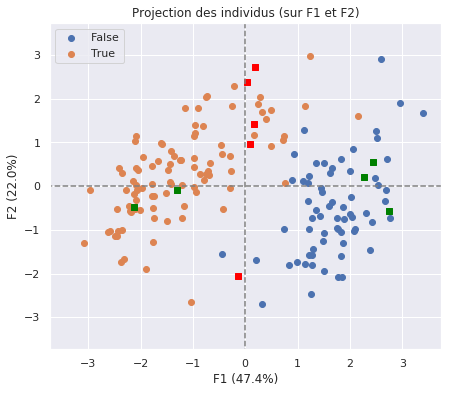

In [44]:
#Projection des individus dans le 1er plan factoriel
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],#, (2,3), (4,5)],
                         labels=None,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.scatter(X_projected[12,0], X_projected[12,1], marker='s', c='red')
plt.scatter(X_projected[21,0], X_projected[21,1], marker='s', c='red')
plt.scatter(X_projected[27,0], X_projected[27,1], marker='s', c='red')
plt.scatter(X_projected[34,0], X_projected[34,1], marker='s', c='red')
plt.scatter(X_projected[152,0], X_projected[152,1], marker='s', c='red')
plt.scatter(X_projected[46,0], X_projected[46,1], marker='s', c='green')
plt.scatter(X_projected[94,0], X_projected[94,1], marker='s', c='green')
plt.scatter(X_projected[101,0], X_projected[101,1], marker='s', c='green')
plt.scatter(X_projected[123,0], X_projected[123,1], marker='s', c='green')
plt.scatter(X_projected[143,0], X_projected[143,1], marker='s', c='green')
plt.savefig('graph/proj_ind_qual_repr_f1_head_tail.png')
plt.show()

In [45]:
#Les 5 billets avec la moins bonne qualité de représentation sur l'axe d'inertie secondaire
qual_repr2.sort_values(by='COS2_2').head(5)

,is_genuine,COS2_1,COS2_2,premier_plan_fact
2,True,78.5,0.0,79.5
31,True,70.9,0.0,71.9
80,True,47.6,0.0,48.6
137,False,72.9,0.0,72.9
35,True,2.5,0.0,3.5


In [46]:
#Les 5 billets avec la meilleure qualité de représentation sur l'axe d'inertie secondaire
qual_repr2.sort_values(by='COS2_2').tail(5)

,is_genuine,COS2_1,COS2_2,premier_plan_fact
23,True,0.7,85.1,86.8
34,True,0.4,89.1,90.5
33,True,1.7,91.1,93.8
156,False,1.3,91.9,93.2
21,True,0.0,93.6,94.6


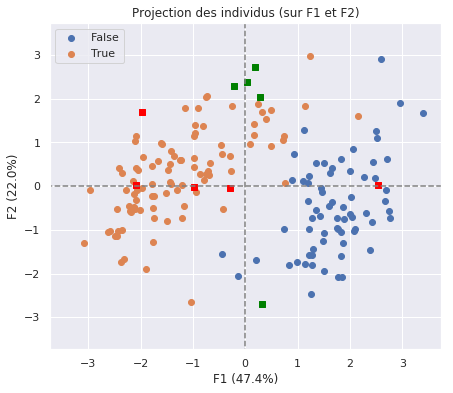

In [47]:
#Projection des individus dans le 1er plan factoriel
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],#, (2,3), (4,5)],
                         labels=None,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.scatter(X_projected[2,0], X_projected[22,1], marker='s', c='red')
plt.scatter(X_projected[31,0], X_projected[31,1], marker='s', c='red')
plt.scatter(X_projected[35,0], X_projected[35,1], marker='s', c='red')
plt.scatter(X_projected[80,0], X_projected[80,1], marker='s', c='red')
plt.scatter(X_projected[137,0], X_projected[137,1], marker='s', c='red')
plt.scatter(X_projected[21,0], X_projected[21,1], marker='s', c='green')
plt.scatter(X_projected[23,0], X_projected[23,1], marker='s', c='green')
plt.scatter(X_projected[33,0], X_projected[33,1], marker='s', c='green')
plt.scatter(X_projected[34,0], X_projected[34,1], marker='s', c='green')
plt.scatter(X_projected[156,0], X_projected[156,1], marker='s', c='green')
plt.savefig('graph/proj_ind_qual_repr_f2_head_tail.png')
plt.show()

<a id='analyse2'></a>
<h3 style='color:#8677b2'>Analyse de la contribution aux axes</h3>

[Haut de page](#sommaire)

In [48]:
#Contribution des individus aux axes
ctr = X_projected**2
for j in range(p):
    ctr[:,j] = 100 * ctr[:,j]/(n*eigval[j])

ctr_ax = pd.DataFrame(np.around(ctr, 2),
                     index=is_genuine,
                     columns=['CTR_' + str(i + 1) for i in range(p)])

ctr_ax = ctr_ax.reset_index()

ctr_ax.head()

,is_genuine,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6
0,True,0.96,1.14,2.20,6.81,1.04,4.89
1,True,0.92,0.12,0.20,0.14,0.01,0.90
2,True,0.80,0.00,0.51,0.16,0.38,0.02
3,True,0.88,0.00,0.19,0.31,0.00,0.00
4,True,1.19,0.08,7.59,0.81,0.38,0.60


In [49]:
#Vérification du calcul de la contribution aux axes
np.sum(ctr_ax,axis=0)

is_genuine    100.00
CTR_1         100.02
CTR_2         100.01
CTR_3         100.04
CTR_4         100.07
CTR_5         100.00
CTR_6         100.01
dtype: float64

In [50]:
#Les 5 billets avec la moins bonne contribution dans le 1er plan factoriel
ctr_ax1 = ctr_ax[['is_genuine', 'CTR_1', 'CTR_2']]
ctr_ax2 = ctr_ax1.copy()
ctr_ax2['premier_plan_fact'] = ctr_ax2.sum(axis=1)
ctr_ax2.sort_values(by='premier_plan_fact').head(5)

,is_genuine,CTR_1,CTR_2,premier_plan_fact
102,False,0.17,0.01,0.18
118,False,0.25,0.01,0.26
114,False,0.30,0.00,0.30
128,False,0.31,0.02,0.33
150,False,0.30,0.05,0.35


In [51]:
#Les 5 billets avec la meilleure contribution dans le 1er plan factoriel
ctr_ax2.sort_values(by='premier_plan_fact').tail()

,is_genuine,CTR_1,CTR_2,premier_plan_fact
49,True,1.96,0.75,3.71
34,True,0.01,3.33,4.34
70,True,0.22,3.15,4.37
166,False,1.38,3.79,5.17
5,True,0.32,3.97,5.29


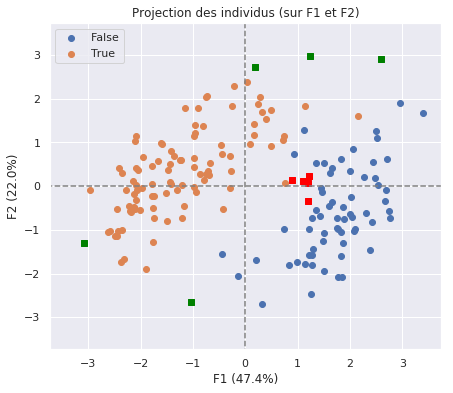

In [52]:
#Projection des individus dans le 1er plan factoriel
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],#, (2,3), (4,5)],
                         labels=None,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.scatter(X_projected[102,0], X_projected[102,1], marker='s', c='red')
plt.scatter(X_projected[114,0], X_projected[114,1], marker='s', c='red')
plt.scatter(X_projected[118,0], X_projected[118,1], marker='s', c='red')
plt.scatter(X_projected[128,0], X_projected[128,1], marker='s', c='red')
plt.scatter(X_projected[150,0], X_projected[150,1], marker='s', c='red')
plt.scatter(X_projected[5,0], X_projected[5,1], marker='s', c='green')
plt.scatter(X_projected[34,0], X_projected[34,1], marker='s', c='green')
plt.scatter(X_projected[49,0], X_projected[49,1], marker='s', c='green')
plt.scatter(X_projected[70,0], X_projected[70,1], marker='s', c='green')
plt.scatter(X_projected[166,0], X_projected[166,1], marker='s', c='green')
plt.savefig('graph/proj_ind_contr_plan_fact_head_tail.png')
plt.show()

In [53]:
#Description de tous les billets
ctr_ax2.describe()

,CTR_1,CTR_2,premier_plan_fact
count,170.000000,170.000000,170.000000
mean,0.588353,0.588294,1.764882
std,0.478928,0.781853,0.905102
min,0.000000,0.000000,0.180000
25%,0.192500,0.060000,1.175000
50%,0.470000,0.235000,1.630000
75%,0.890000,0.825000,2.127500
max,2.380000,3.970000,5.290000


In [54]:
#Description des vrais billets
ctr_ax2[ctr_ax2['is_genuine'] == True].describe()

,CTR_1,CTR_2,premier_plan_fact
count,100.000000,100.00000,100.000000
mean,0.513200,0.55490,2.068100
std,0.457803,0.78027,0.794543
min,0.000000,0.00000,1.020000
25%,0.110000,0.05750,1.477500
50%,0.395000,0.20000,1.935000
75%,0.890000,0.68250,2.490000
max,1.960000,3.97000,5.290000


In [55]:
#Description des faux billets
ctr_ax2[ctr_ax2['is_genuine'] == False].describe()

,CTR_1,CTR_2,premier_plan_fact
count,70.000000,70.000000,70.000000
mean,0.695714,0.636000,1.331714
std,0.491132,0.787258,0.881529
min,0.000000,0.000000,0.180000
25%,0.330000,0.100000,0.672500
50%,0.600000,0.280000,1.185000
75%,0.897500,1.045000,1.665000
max,2.380000,3.790000,5.170000


In [56]:
#Les 5 billets avec la moins bonne contribution sur l'axe d'inertie principal
ctr_ax2.sort_values(by='CTR_1').head(5)

,is_genuine,CTR_1,CTR_2,premier_plan_fact
152,False,0.00,1.89,1.89
27,True,0.00,0.42,1.42
21,True,0.00,2.52,3.52
25,True,0.01,1.58,2.59
53,True,0.01,1.51,2.52


In [57]:
#Les 5 billets avec la meilleure contribution sur l'axe d'inertie principal
ctr_ax2.sort_values(by='CTR_1').tail(5)

,is_genuine,CTR_1,CTR_2,premier_plan_fact
158,False,1.58,0.24,1.82
112,False,1.80,1.63,3.43
29,True,1.81,0.00,2.81
49,True,1.96,0.75,3.71
122,False,2.38,1.24,3.62


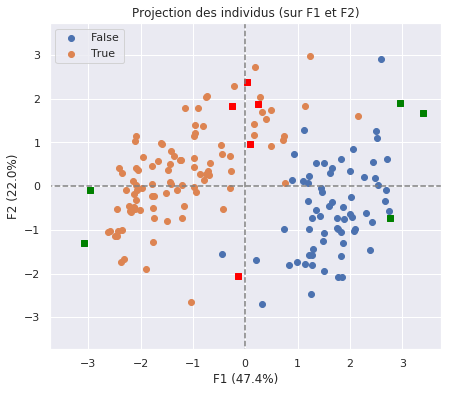

In [58]:
#Projection des individus dans le 1er plan factoriel
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],#, (2,3), (4,5)],
                         labels=None,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.scatter(X_projected[21,0], X_projected[21,1], marker='s', c='red')
plt.scatter(X_projected[25,0], X_projected[25,1], marker='s', c='red')
plt.scatter(X_projected[27,0], X_projected[27,1], marker='s', c='red')
plt.scatter(X_projected[53,0], X_projected[53,1], marker='s', c='red')
plt.scatter(X_projected[152,0], X_projected[152,1], marker='s', c='red')
plt.scatter(X_projected[29,0], X_projected[29,1], marker='s', c='green')
plt.scatter(X_projected[49,0], X_projected[49,1], marker='s', c='green')
plt.scatter(X_projected[112,0], X_projected[112,1], marker='s', c='green')
plt.scatter(X_projected[122,0], X_projected[122,1], marker='s', c='green')
plt.scatter(X_projected[158,0], X_projected[158,1], marker='s', c='green')
plt.savefig('graph/proj_ind_contr_f1_head_tail.png')
plt.show()

In [59]:
#Les 5 billets avec la moins bonne contribution sur l'axe d'inertie secondaire
ctr_ax2.sort_values(by='CTR_2').head(5)

,is_genuine,CTR_1,CTR_2,premier_plan_fact
29,True,1.81,0.0,2.81
46,True,0.35,0.0,1.35
47,True,0.43,0.0,1.43
35,True,0.02,0.0,1.02
124,False,0.44,0.0,0.44


In [60]:
#Les 5 billets avec la moins bonne contribution sur l'axe d'inertie secondaire
ctr_ax2.sort_values(by='CTR_2').tail(5)

,is_genuine,CTR_1,CTR_2,premier_plan_fact
70,True,0.22,3.15,4.37
156,False,0.02,3.23,3.25
34,True,0.01,3.33,4.34
166,False,1.38,3.79,5.17
5,True,0.32,3.97,5.29


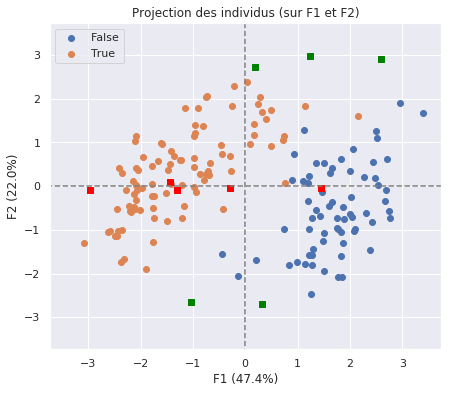

In [61]:
#Projection des individus dans le 1er plan factoriel
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],#, (2,3), (4,5)],
                         labels=None,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.scatter(X_projected[29,0], X_projected[29,1], marker='s', c='red')
plt.scatter(X_projected[35,0], X_projected[35,1], marker='s', c='red')
plt.scatter(X_projected[46,0], X_projected[46,1], marker='s', c='red')
plt.scatter(X_projected[47,0], X_projected[47,1], marker='s', c='red')
plt.scatter(X_projected[124,0], X_projected[124,1], marker='s', c='red')
plt.scatter(X_projected[5,0], X_projected[5,1], marker='s', c='green')
plt.scatter(X_projected[34,0], X_projected[34,1], marker='s', c='green')
plt.scatter(X_projected[70,0], X_projected[70,1], marker='s', c='green')
plt.scatter(X_projected[156,0], X_projected[156,1], marker='s', c='green')
plt.scatter(X_projected[166,0], X_projected[166,1], marker='s', c='green')
plt.savefig('graph/proj_ind_contr_f2_head_tail.png')
plt.show()

<a id='m2'></a>
## Mission 2

<a id='classification'></a>
<h3 style='color:#8677b2'>Classification</h3>

[Haut de page](#sommaire)

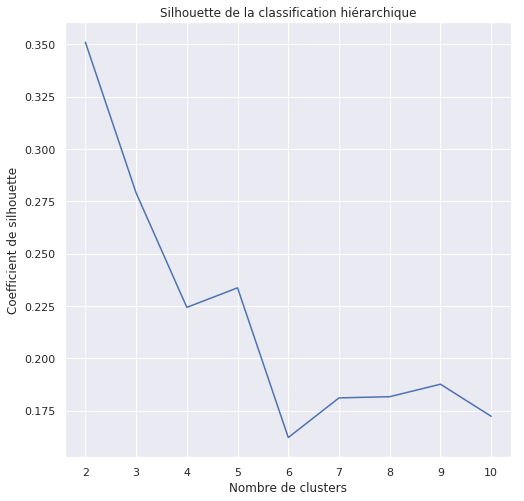

In [62]:
#Faire varier le nombre de clusters de 2 à 10 avec la métrique "silhouette"
res_ch = np.arange(9,dtype='float')
for k in np.arange(9):
    Z = linkage(X_scaled, 'ward')
    clusterh = fcluster(Z, k+2, criterion='maxclust')
    res_ch[k] = metrics.silhouette_score(X_scaled,clusterh)

#Graphique
plt.title("Silhouette de la classification hiérarchique")
plt.xlabel("Nombre de clusters")
plt.ylabel('Coefficient de silhouette')
plt.plot(np.arange(2,11,1),res_ch)
plt.savefig('graph/silhouette_ch.png')
plt.show()

In [63]:
#Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

clusterh = fcluster(Z, 2, criterion='maxclust')
clusterh

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

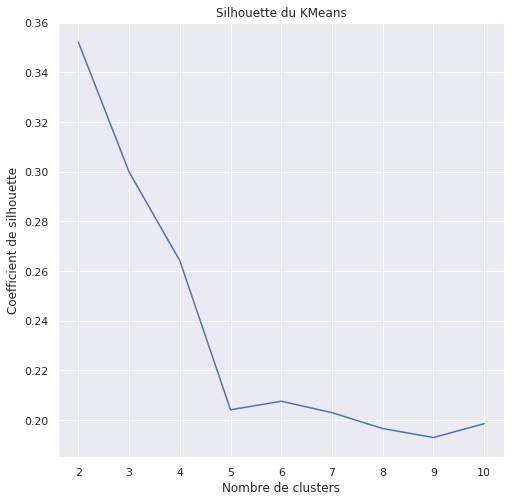

In [64]:
#faire varier le nombre de clusters de 2 à 10 avec la métrique "silhouette"
res_k = np.arange(9,dtype='float')
for k in np.arange(9):
    km = KMeans(n_clusters=k+2)
    km.fit(X_scaled)
    res_k[k] = metrics.silhouette_score(X_scaled,km.labels_)

#graphique
plt.title("Silhouette du KMeans")
plt.xlabel("Nombre de clusters")
plt.ylabel('Coefficient de silhouette')
plt.plot(np.arange(2,11,1),res_k)
plt.savefig('graph/silhouette_k.png')
plt.show()

In [65]:
#Clustering par KMeans
km = KMeans(n_clusters=2)
km.fit(X_scaled)

clusterkm = km.labels_
clusterkm

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

<a id='visualisation'></a>
<h3 style='color:#8677b2'>Visualisation de la partition</h3>

[Haut de page](#sommaire)

* Classification hierarchique

In [66]:
#matrice de confusion
mat_confh = pd.crosstab(is_genuine, clusterh, rownames=['is_genuine'], colnames=['Cluster'])
mat_confh

Cluster,1,2
is_genuine,,
False,69,1
True,2,98


In [67]:
#Création du dataframe d'appartenance des pays à chaque cluster
clusterdf = pd.DataFrame({'is_genuine':is_genuine, 'Cluster':clusterh})

vrais_posh = clusterdf[(clusterdf['is_genuine'] == True) & (clusterdf['Cluster'] == 2)]
vrais_negh = clusterdf[(clusterdf['is_genuine'] == False) & (clusterdf['Cluster'] == 1)]
faux_posh = clusterdf[(clusterdf['is_genuine'] == False) & (clusterdf['Cluster'] == 2)]
faux_negh = clusterdf[(clusterdf['is_genuine'] == True) & (clusterdf['Cluster'] == 1)]
len(faux_posh), len(vrais_posh), len(faux_negh), len(vrais_negh)

(1, 98, 2, 69)

In [68]:
#Sensibilité de la classification
sensh = len(vrais_posh) / (len(vrais_posh) + len(faux_negh))
sensh

0.98

In [69]:
#Spécificité de la classification
spech = len(vrais_negh) / (len(faux_posh) + len(vrais_negh))
spech

0.9857142857142858

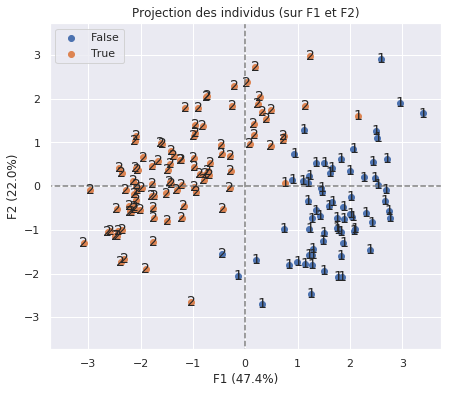

In [70]:
#Projection des individus
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],
                         labels=clusterh,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.savefig('graph/Proj_ind_ch.png')
plt.show()

* Classification par KMeans

In [71]:
#matrice de confusion
mat_confk = pd.crosstab(is_genuine, clusterkm, rownames=['is_genuine'], colnames=['Cluster'])
mat_confk

Cluster,0,1
is_genuine,,
False,69,1
True,8,92


In [72]:
#Création du dataframe d'appartenance des pays à chaque cluster
clusterk = pd.DataFrame({'is_genuine':is_genuine, 'Cluster':clusterkm})

vrais_posk = mat_confk.iloc[1].max()
vrais_negk = mat_confk.iloc[0].max()
faux_posk = mat_confk.iloc[0].min()
faux_negk = mat_confk.iloc[1].min()
vrais_posk, vrais_negk, faux_posk, faux_negk

(92, 69, 1, 8)

In [73]:
#Sensibilité de la classification
sensk = vrais_posk / (vrais_posk + faux_negk)
sensk

0.92

In [74]:
#Spécificité de la classification
speck = vrais_negk / (faux_posk + vrais_negk)
speck

0.9857142857142858

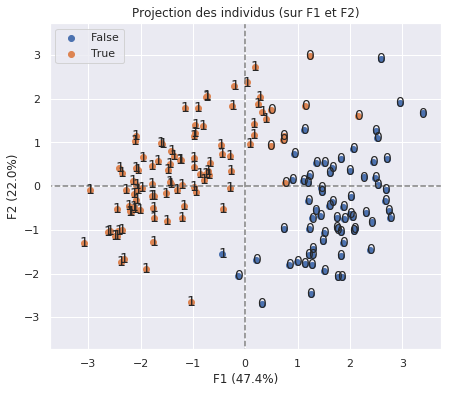

In [75]:
#Projection des individus
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],
                         labels=clusterkm,
                         alpha=1,
                         illustrative_var=is_genuine)
plt.savefig('graph/Proj_ind_kmeans.png')
plt.show()

<a id='m3'></a>
## Mission 3

<a id='regression'></a>
<h3 style='color:#8677b2'>Regression logistique</h3>

[Haut de page](#sommaire)

In [76]:
billets.head(1)

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
0,True,171.81,104.86,104.95,4.52,2.89,112.83


In [77]:
#Variables explicatives
X = billets[['length', 'height_left', 'height_right', 'margin_low', 'margin_up', 'diagonal']]

#Variable à expliquer
y = billets.is_genuine

In [78]:
#Partition aléatoire du jeu de données en 70% pour créer le modèle, 30% pour tester le modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [79]:
#Régression logistique
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

#Stockage de prédictions
y_pred = logreg.predict(X_test)

In [80]:
#Matrice de confusion
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix

,0,1
0,20,1
1,1,29


In [81]:
#Composition de la matrice de confusion
vrais_poslr = cnf_matrix[1][1]
vrais_neglr = cnf_matrix[0][0]
faux_poslr = cnf_matrix[1][0]
faux_neglr = cnf_matrix[0][1]
vrais_poslr, vrais_neglr, faux_poslr, faux_neglr

(29, 20, 1, 1)

In [82]:
#Sensibilité de la régression logistique 31/(31+0)
senslr = vrais_poslr / ((vrais_poslr) + faux_neglr)
senslr

0.9666666666666667

In [83]:
#Spécificité de la régression logistique 19/(19+1)
speclr = vrais_neglr / (vrais_neglr + faux_poslr)
speclr

0.9523809523809523

In [84]:
#Exactitude V/Tot reussite/N 50/51
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

#Valeur predictive positive VP/(VP+FP) 31/(31+1)
print("Precision:",metrics.precision_score(y_test, y_pred))

#Valeur prédictive négative VP/(VP+FN) 19/(19+0)
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9607843137254902
Precision: 0.9666666666666667
Recall: 0.9666666666666667


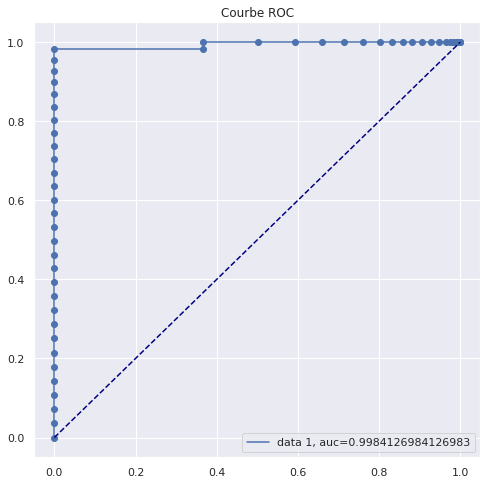

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.36553443, 0.36553443, 0.50128633, 0.59234533, 0.65950263,
        0.71393609, 0.7601159 , 0.80200789, 0.8329401 , 0.85871926,
        0.88221681, 0.90565968, 0.92731036, 0.94784614, 0.96403433,
        0.97518969, 0.98266535, 0.98956672, 0.99568987, 0.99892018,
        0.99948936, 1.        ]),
 array([0.        , 0.03607451, 0.07191643, 0.10774658, 0.14356291,
        0.17931802, 0.21506621, 0.25077566, 0.286351  , 0.32184928,
        0.35731362, 0.39271641, 0.42785242, 0.46292042, 0.49797123,
        0.53270567, 0.56729888, 0.60159014, 0.63577093, 0.66993766,
        0.7040

In [85]:
#Courbe Receiver Operating Characteristic (Area Under the roC) (fonction d'efficacité du recepteur)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, sample_weight=y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'bo')
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Courbe ROC')
plt.legend()
plt.savefig('graph/roc.png')
plt.show()
fpr, tpr, auc, _

<a id='test'></a>
<h3 style='color:#8677b2'>Test sur un nouvel échatillon</h3>

[Haut de page](#sommaire)

In [86]:
#Chargement des données
exemple = pd.read_csv('exemple.csv')

#Préparation des données
X_ex = exemple[billets_idx].values

#Application du modèle
y_pred_ex = logreg.predict(X_ex)

#Ajout du resultat
exemple['predict_is_genuine'] = y_pred_ex

#Calcul des probas d'affectaion sur l'ech. à prédire
probas_ex = logreg.predict_proba(X_ex)

exemple['Probas_faux'] = probas_ex[:,0]
exemple['Probas_vrais'] = probas_ex[:,1]
exemple

,length,height_left,height_right,margin_low,margin_up,diagonal,id,predict_is_genuine,Probas_faux,Probas_vrais
0,171.76,104.01,103.54,5.21,3.30,111.42,B_1,False,0.950199,0.049801
1,171.87,104.17,104.13,6.00,3.31,112.09,B_2,False,0.986830,0.013170
2,172.00,104.58,104.29,4.99,3.39,111.57,B_3,False,0.963815,0.036185
3,172.49,104.55,104.34,4.44,3.03,113.20,B_4,True,0.156678,0.843322
4,171.65,103.63,103.56,3.77,3.16,113.33,B_5,True,0.006558,0.993442


In [87]:
#Restriction sur vrais et les faux billets
vrais_billets = exemple[exemple['predict_is_genuine'] == True]
faux_billets = exemple[exemple['predict_is_genuine'] == False]

In [88]:
#Impression des identifiants des vrais billets et de leurs probalités
a1 = ['Le billet ' + str(vrais_billets.iloc[i,6]) +
      ' semble être un vrai avec une probilité de ' +
      str(vrais_billets.iloc[i,9]) for i in range(vrais_billets.shape[0])]
for j in range(vrais_billets.shape[0]):
    print(a1[j])

Le billet B_4 semble être un vrai avec une probilité de 0.8433222761033701
Le billet B_5 semble être un vrai avec une probilité de 0.993442037100778


In [89]:
#Impression des identifiants des vrais billets et de leurs probalités
a1 = ['Le billet ' + str(faux_billets.iloc[i,6]) +
      ' semble être un faux avec une probilité de ' +
      str(faux_billets.iloc[i,8]) for i in range(faux_billets.shape[0])]
for j in range(faux_billets.shape[0]):
    print(a1[j])

Le billet B_1 semble être un faux avec une probilité de 0.9501991414731416
Le billet B_2 semble être un faux avec une probilité de 0.9868303284825137
Le billet B_3 semble être un faux avec une probilité de 0.9638145387011205


[Haut de page](#sommaire)